In [22]:
import numpy as np
import matplotlib.pyplot as plt
#%matplotlib inline
#%config BackendInline.figure_format='svg'

plt.style.use(['seaborn-notebook',])
plt.matplotlib.rcParams['figure.dpi'] = 120
plt.matplotlib.rcParams['savefig.dpi'] = 120

plt.matplotlib.rcParams['mathtext.fontset'] = 'stix'
plt.matplotlib.rcParams['font.family'] = 'STIXGeneral'

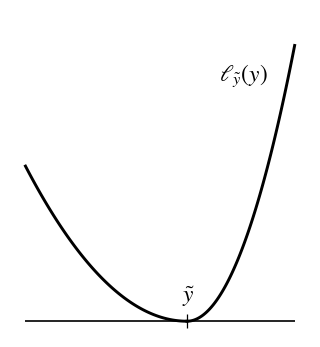

In [32]:
plt.figure(figsize=(3.0, 3.0))
range_x1 = np.linspace(-3., 0., 100)
range_x2 = np.linspace(0., 2., 100)
plt.hlines(0, -3, 2, color='k', linewidth=1.0)
plt.plot(range_x1, 0.25*range_x1**2, color='k', linestyle='-')
plt.plot(range_x2, range_x2**2, color='k', linestyle='-')
plt.xticks([0,], [r'$\tilde y$',])
# plt.vlines(0.75, 0., 0.75*0.75, linewidth=0.75, linestyle='--')
# plt.vlines(-1.5, 0., 0.25*1.5*1.5, linewidth=0.75, linestyle='--')
# plt.hlines(0.75*0.75, -1.5, 0.75, linewidth=0.75, linestyle='--')
# plt.hlines(0, -1.5, 0.75, linewidth=2.0)
plt.vlines(0, -0.1, 0.1, color='k', linewidth=0.75)
plt.yticks([], [])
ax = plt.gca()
ax.set_axis_off()
plt.text(-0.1, 0.3, r'$\tilde y$', {'size':14})
plt.text(0.6, 3.5, r'$\ell_{\tilde y}(y)$', {'size':14})
plt.ylim(-0.2, 4.5)
plt.tight_layout()
plt.savefig('fig/loss_func.eps')
plt.show()